In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the Excel file
excel_file = pd.ExcelFile("penalty_dataset.xlsx")

# parse the desired sheet
df = excel_file.parse("penalty_dataset")

# save it as a CSV
df.to_csv("penalty_dataset.csv", index=False)

df = pd.read_csv("penalty_dataset.csv")

# display the first few rows and column names
df.head(), df.columns

(  gender               season_name  competition_id            competition  \
 0    men  2000 Netherlands/Belgium              18  European Championship   
 1    men  2000 Netherlands/Belgium              18  European Championship   
 2    men  2000 Netherlands/Belgium              18  European Championship   
 3    men  2000 Netherlands/Belgium              18  European Championship   
 4    men  2000 Netherlands/Belgium              18  European Championship   
 
          stage  match_date  match_id  event_id  home_team_id       home_team  \
 0  Group Stage  2000-06-11       631      5031           785     Netherlands   
 1  Group Stage  2000-06-11      9201     12919           713          Turkey   
 2  Group Stage  2000-06-16      5562      1162           272  Czech Republic   
 3  Group Stage  2000-06-20      9772      8763           169         England   
 4  Group Stage  2000-06-20      9772     10668           169         England   
 
    ...       away_team home_score  away_s

## Who has scored the 5th most penalties since the start of 2015 (excluding penalty shootouts)? And how many have they scored?

In [3]:
# convert match_date to datetime
df['match_date'] = pd.to_datetime(df['match_date'], errors='coerce')

# filter data: since start of 2015 and exclude penalty shootouts
filtered_df = df[
    (df['match_date'] >= '2015-01-01') &
    (df['event_type'] == 'Penalty Goal') &
    (df['shootout_order'].isna())
]

# count penalty goals per player
penalty_counts = filtered_df['player'].value_counts().reset_index()
penalty_counts.columns = ['player', 'penalty_goals']

# get the 5th highest scorer
fifth_scorer = penalty_counts.iloc[4]  # 0-indexed

fifth_scorer

,4
player,Harry Kane
penalty_goals,39


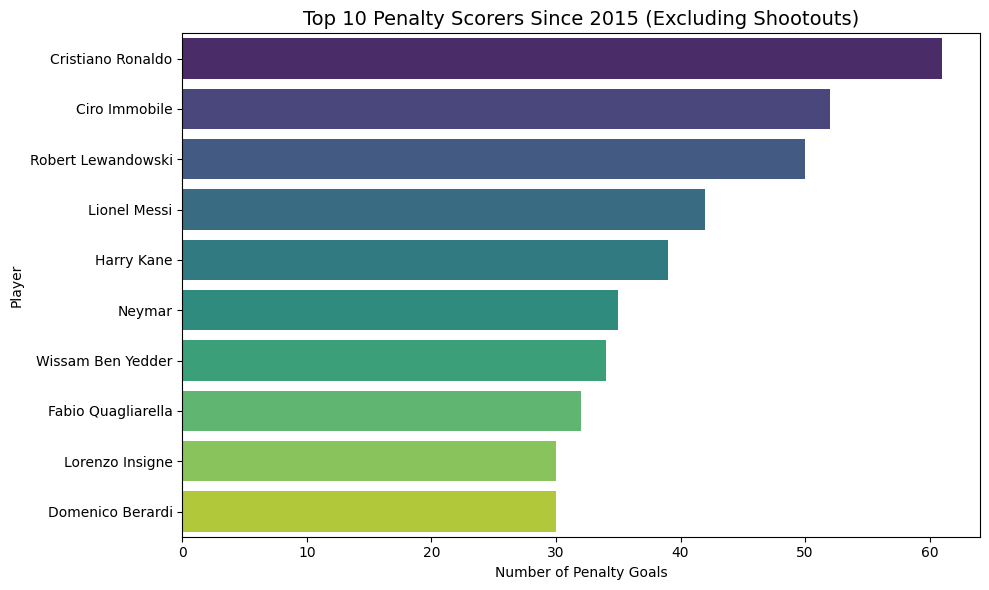

In [4]:
# select top 10 penalty scorers
top_scorers = penalty_counts.head(10)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_scorers, x='penalty_goals', y='player', hue='player', palette='viridis', legend=False)
plt.title('Top 10 Penalty Scorers Since 2015 (Excluding Shootouts)', fontsize=14)
plt.xlabel('Number of Penalty Goals')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

## What 10 minute window had the most penalties awarded within it and how many penalties were awarded?

In [5]:
# convert 'time' to numeric (some might be strings like '90+2')
def parse_minute(val):
    try:
        return int(str(val).split('+')[0])
    except:
        return None

filtered_df = filtered_df.copy()

# Convert 'time' to numeric
filtered_df['minute'] = filtered_df['time'].apply(parse_minute)

# Create 10-minute windows
filtered_df['minute_bin'] = (filtered_df['minute'] // 10) * 10

# count penalties
window_counts = filtered_df['minute_bin'].value_counts().reset_index()
window_counts.columns = ['start_minute', 'penalty_count']
window_counts = window_counts.sort_values(by='penalty_count', ascending=False)

# get the most common 10-minute window
top_window = window_counts.iloc[0]

start = top_window['start_minute']
end = start + 9
count = top_window['penalty_count']

print(f"The 10-minute window with the most penalties is {start}-{end} minutes with {count} penalties.")

The 10-minute window with the most penalties is 50-59 minutes with 760 penalties.


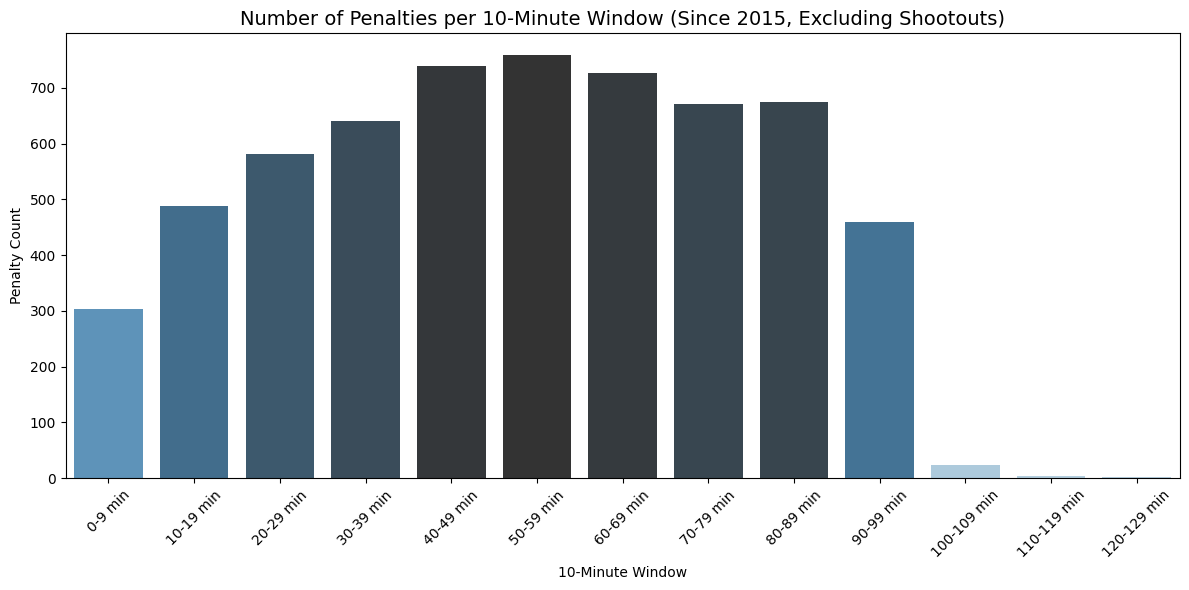

In [44]:
# create a label for each 10-minute window
window_counts['window_label'] = window_counts['start_minute'].astype(str) + '-' + (window_counts['start_minute'] + 9).astype(str) + ' min'

# sort by minute for a cleaner plot (not by count)
window_counts_sorted = window_counts.sort_values(by='start_minute')

# plot
plt.figure(figsize=(12, 6))
sns.barplot(data=window_counts_sorted, x='window_label', y='penalty_count', hue='penalty_count', palette='Blues_d', legend=False)
plt.xticks(rotation=45)
plt.title('Number of Penalties per 10-Minute Window (Since 2015, Excluding Shootouts)', fontsize=14)
plt.xlabel('10-Minute Window')
plt.ylabel('Penalty Count')
plt.tight_layout()
plt.show()

### Basic Overview

In [7]:
# Shape of the dataset
df.shape

(15093, 21)

In [8]:
# Peek at the data
df.head()

,gender,season_name,competition_id,competition,stage,match_date,match_id,event_id,home_team_id,home_team,...,away_team,home_score,away_score,player_id,player,team_id,half,time,event_type,shootout_order
0,men,2000 Netherlands/Belgium,18,European Championship,Group Stage,2000-06-11,631,5031,785,Netherlands,...,Czech Republic,0,0,512,Frank de Boer,785,2,89,Penalty Goal,NaN
1,men,2000 Netherlands/Belgium,18,European Championship,Group Stage,2000-06-11,9201,12919,713,Turkey,...,Italy,1,1,3933,Filippo Inzaghi,951,2,70,Penalty Goal,NaN
2,men,2000 Netherlands/Belgium,18,European Championship,Group Stage,2000-06-16,5562,1162,272,Czech Republic,...,France,0,1,3516,Karel Poborsky,272,1,35,Penalty Goal,NaN
3,men,2000 Netherlands/Belgium,18,European Championship,Group Stage,2000-06-20,9772,8763,169,England,...,Romania,0,1,62,Alan Shearer,169,1,41,Penalty Goal,NaN
4,men,2000 Netherlands/Belgium,18,European Championship,Group Stage,2000-06-20,9772,10668,169,England,...,Romania,2,2,3614,NaN,340,2,89,Penalty Goal,NaN


In [9]:
print(df.columns.tolist())

['gender', 'season_name', 'competition_id', 'competition', 'stage', 'match_date', 'match_id', 'event_id', 'home_team_id', 'home_team', 'away_team_id', 'away_team', 'home_score', 'away_score', 'player_id', 'player', 'team_id', 'half', 'time', 'event_type', 'shootout_order']


In [10]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15093 entries, 0 to 15092
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gender          15093 non-null  object        
 1   season_name     15093 non-null  object        
 2   competition_id  15093 non-null  int64         
 3   competition     15093 non-null  object        
 4   stage           15093 non-null  object        
 5   match_date      15093 non-null  datetime64[ns]
 6   match_id        15093 non-null  int64         
 7   event_id        15093 non-null  int64         
 8   home_team_id    15093 non-null  int64         
 9   home_team       15093 non-null  object        
 10  away_team_id    15093 non-null  int64         
 11  away_team       15093 non-null  object        
 12  home_score      15093 non-null  int64         
 13  away_score      15093 non-null  int64         
 14  player_id       15093 non-null  int64         
 15  pl

In [11]:
# Summary statistics for numeric columns
df.describe(include='all')

,gender,season_name,competition_id,competition,stage,match_date,match_id,event_id,home_team_id,home_team,...,away_team,home_score,away_score,player_id,player,team_id,half,time,event_type,shootout_order
count,15093,15093,15093.000000,15093,15093,15093,15093.000000,15093.000000,15093.000000,15093,...,15093,15093.000000,15093.000000,15093.000000,15051,15093.000000,15093.000000,15093.000000,15093,1389.000000
unique,2,57,NaN,20,32,NaN,NaN,NaN,NaN,830,...,840,NaN,NaN,NaN,4189,NaN,NaN,NaN,4,NaN
top,men,2020/2021,NaN,UEFA Europa League,Regular Season,NaN,NaN,NaN,NaN,Barcelona,...,Roma,NaN,NaN,NaN,Cristiano Ronaldo,NaN,NaN,NaN,Penalty Goal,NaN
freq,13229,1432,NaN,2217,10103,NaN,NaN,NaN,NaN,198,...,183,NaN,NaN,NaN,149,NaN,NaN,NaN,11095,NaN
mean,NaN,NaN,8.750480,NaN,NaN,2015-07-11 10:33:53.631484928,6126.263500,7721.730206,528.500364,NaN,...,NaN,0.841913,0.651825,2221.956867,NaN,530.699000,1.894388,59.505599,NaN,6.036717
min,NaN,NaN,1.000000,NaN,NaN,2000-06-11 00:00:00,1.000000,1.000000,1.000000,NaN,...,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000
25%,NaN,NaN,4.000000,NaN,NaN,2011-08-04 00:00:00,3086.000000,3869.000000,266.000000,NaN,...,NaN,0.000000,0.000000,1124.000000,NaN,266.000000,1.000000,35.000000,NaN,3.000000
50%,NaN,NaN,8.000000,NaN,NaN,2016-05-15 00:00:00,6137.000000,7719.000000,513.000000,NaN,...,NaN,1.000000,0.000000,2217.000000,NaN,512.000000,2.000000,58.000000,NaN,6.000000
75%,NaN,NaN,15.000000,NaN,NaN,2019-11-23 00:00:00,9183.000000,11584.000000,777.000000,NaN,...,NaN,1.000000,1.000000,3320.000000,NaN,780.000000,2.000000,82.000000,NaN,8.000000
max,NaN,NaN,20.000000,NaN,NaN,2022-12-06 00:00:00,12188.000000,15429.000000,1072.000000,NaN,...,NaN,20.000000,12.000000,4450.000000,NaN,1072.000000,5.000000,142.000000,NaN,26.000000


### Check for Missing Data

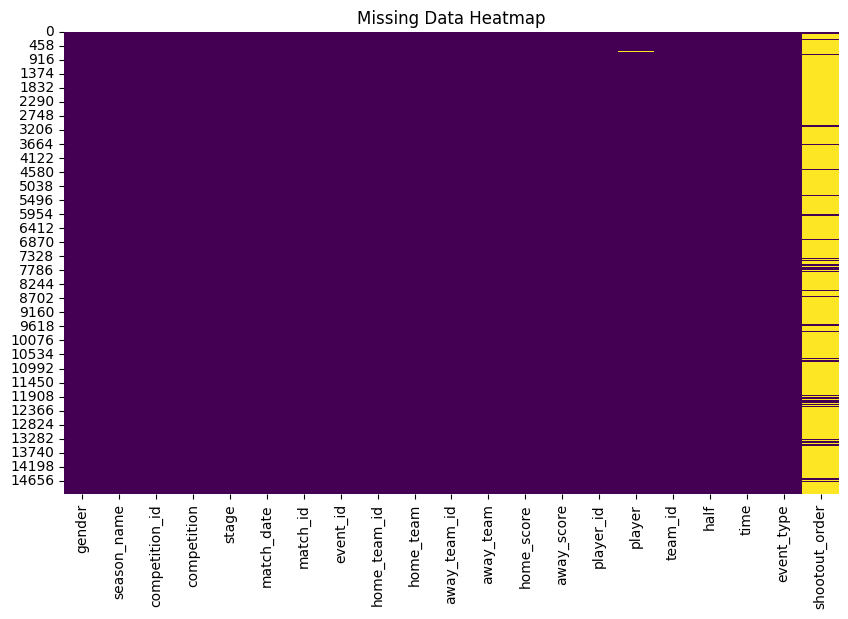

In [12]:
# Count missing values per column
df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### Unique Values & Distributions

In [13]:
# Unique players, teams, competition
df['player'].nunique(), df['home_team'].nunique(), df['away_team'].nunique(), df['competition'].nunique()

(4189, 830, 840, 20)

### Compare Penalty Rates Across Competitions

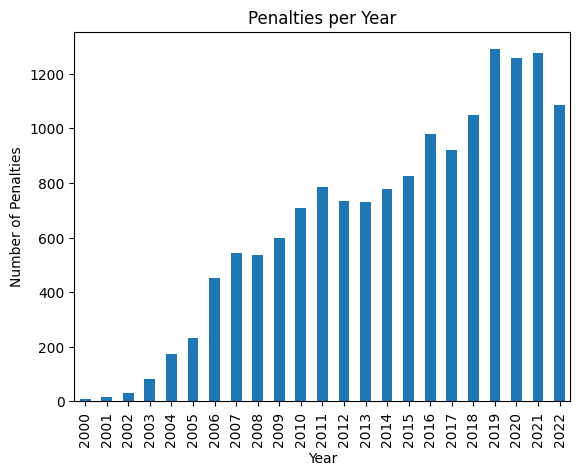

In [14]:
# Distribution of penalties over years
df['match_date'] = pd.to_datetime(df['match_date'], errors='coerce')
df['year'] = df['match_date'].dt.year
df['year'].value_counts().sort_index().plot(kind='bar', title='Penalties per Year')
plt.xlabel("Year")
plt.ylabel("Number of Penalties")
plt.show()

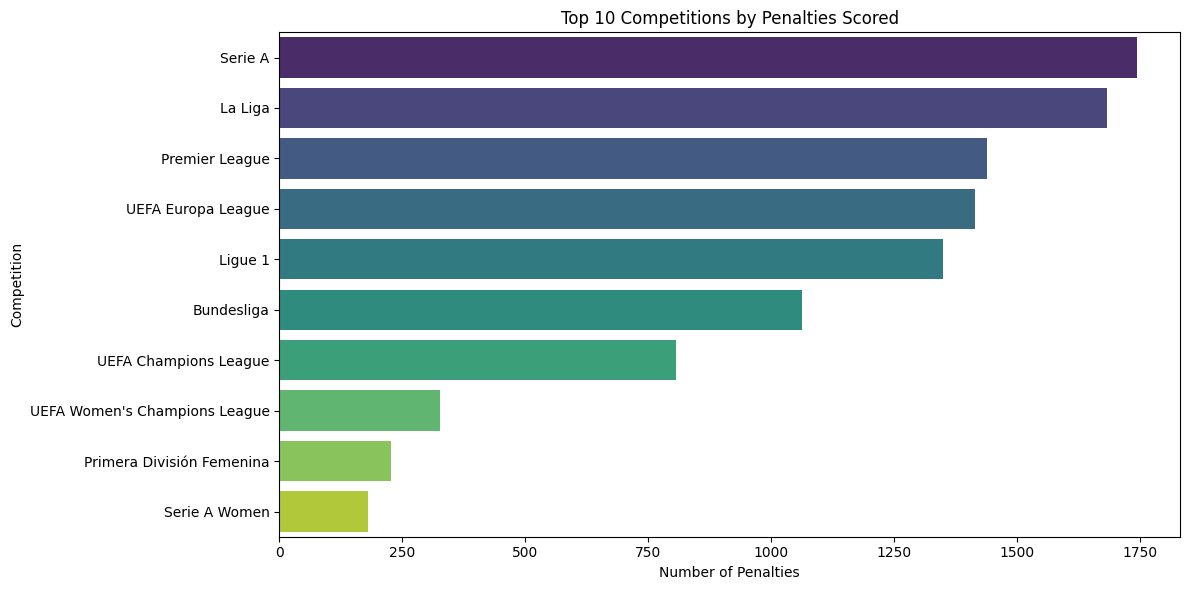

In [41]:
# Only keep penalty goals
penalties_df = df[df['event_type'] == 'Penalty Goal']

# Count penalties per competition
penalties_by_comp = penalties_df['competition'].value_counts().reset_index()
penalties_by_comp.columns = ['competition', 'penalty_count']

# Plot top 10 competitions by penalty count
plt.figure(figsize=(12, 6))
sns.barplot(data=penalties_by_comp.head(10), x='penalty_count', y='competition', hue='competition', palette='viridis')
plt.title('Top 10 Competitions by Penalties Scored')
plt.xlabel('Number of Penalties')
plt.ylabel('Competition')
plt.tight_layout()
plt.show()

### Categorical Breakdown

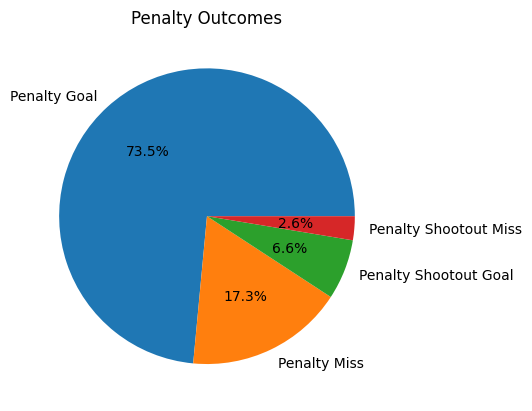

In [16]:
# Penalty outcomes
df['event_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Penalty Outcomes')
plt.ylabel('')
plt.show()

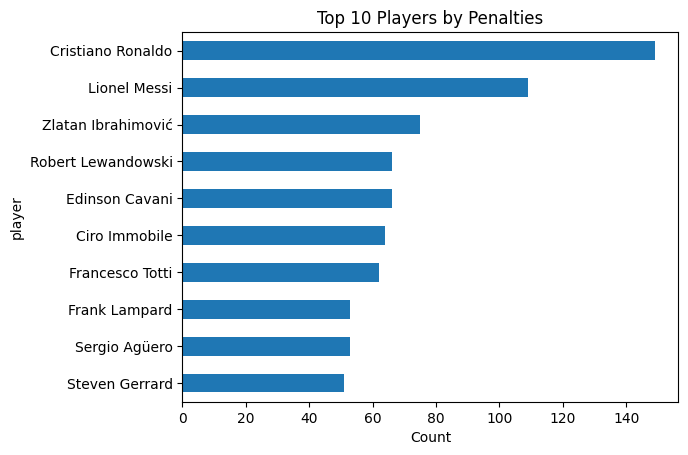

In [17]:
# Top players by penalties taken
df['player'].value_counts().head(10).plot(kind='barh', title='Top 10 Players by Penalties')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

### Time-based Analysis

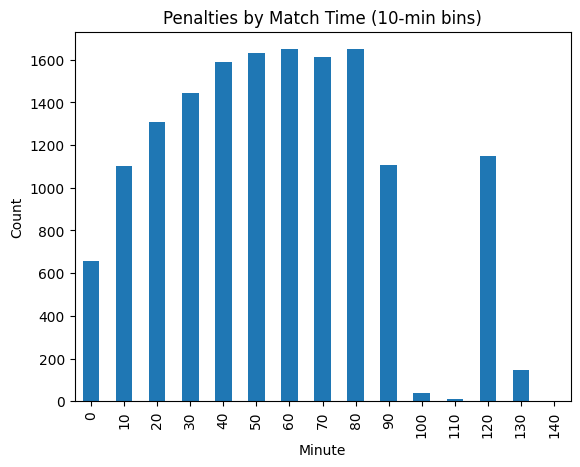

In [18]:
# Penalties by match time (binned)
df['minute'] = df['time'].apply(lambda x: int(str(x).split('+')[0]) if pd.notnull(x) else None)
df['minute_bin'] = (df['minute'] // 10) * 10
df['minute_bin'].value_counts().sort_index().plot(kind='bar', title='Penalties by Match Time (10-min bins)')
plt.xlabel('Minute')
plt.ylabel('Count')
plt.show()

### Are Penalties More Likely in the Second Half?

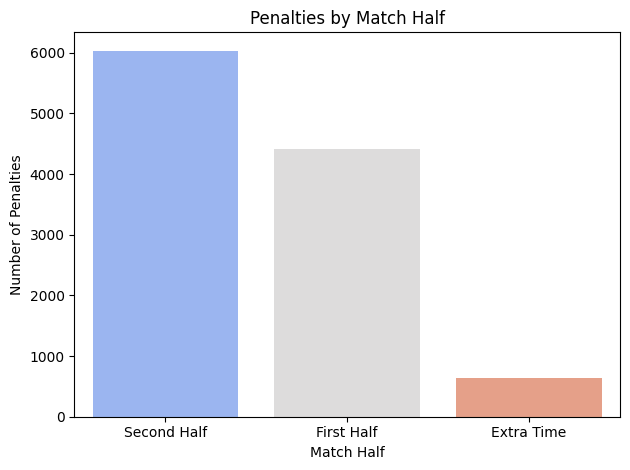

In [82]:
# Clean up and prep
df['match_date'] = pd.to_datetime(df['match_date'], errors='coerce')
df['minute'] = df['time'].apply(lambda x: int(str(x).split('+')[0]) if pd.notnull(x) else None)
df['year'] = df['match_date'].dt.year

# Count Penalties by match half
penalties_df.loc[:,'half'] = df['minute'].apply(lambda x: 'First Half' if x and x <= 45 else 'Second Half' if 45<x<=90 else 'Extra Time')
half_counts = penalties_df['half'].value_counts().reset_index()
half_counts.columns = ['match_half', 'count']

sns.barplot(data=half_counts, x='match_half', y='count', hue='match_half', palette='coolwarm', legend=False)
plt.title('Penalties by Match Half')
plt.ylabel('Number of Penalties')
plt.xlabel('Match Half')
plt.tight_layout()
plt.show()

### Correlations (if numeric features exist)

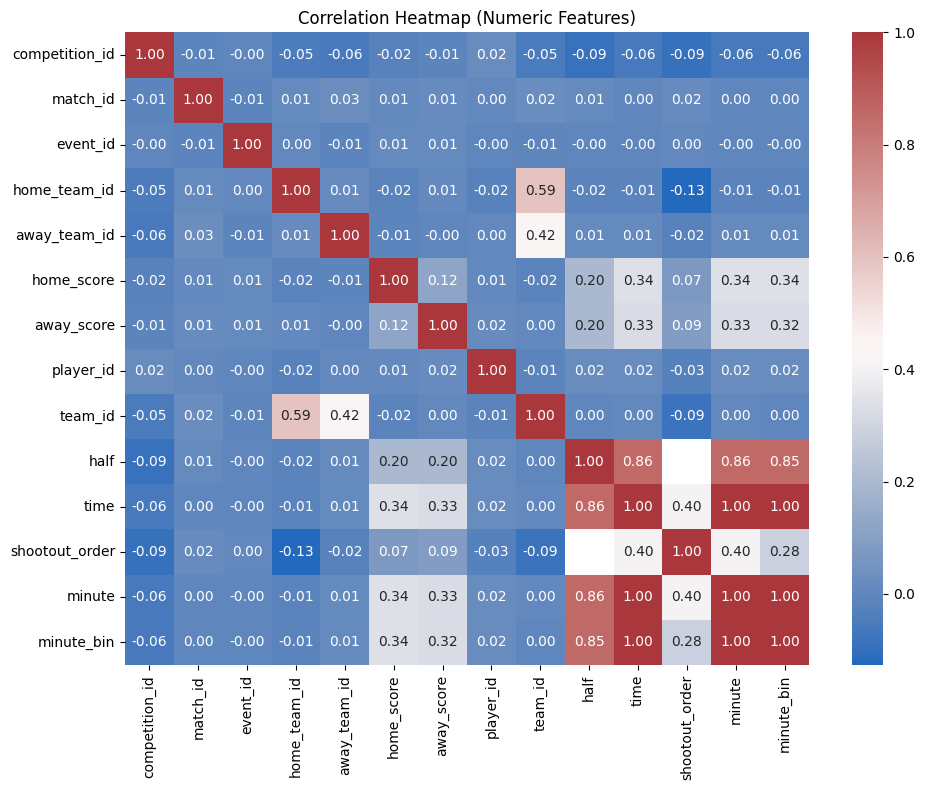

In [23]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.show()

### Trends Per Player and Team

### Groupby Trends: Player, Team, Country

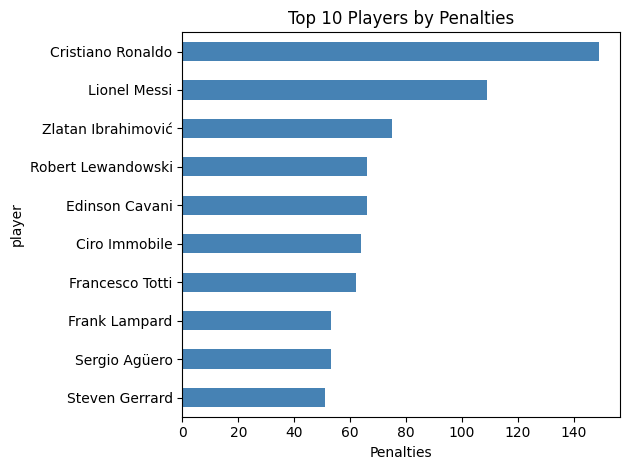

In [20]:
# Penalties per player
penalties_per_player = df['player'].value_counts().head(10)
penalties_per_player.plot(kind='barh', title='Top 10 Players by Penalties', color='steelblue')
plt.xlabel('Penalties')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

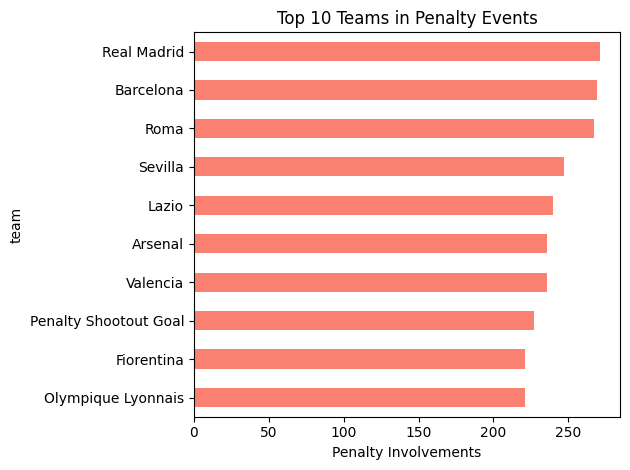

In [21]:
# Get penalties only
penalties_df = df[df['event_type'] == 'Penalty Goal']

# Stack both home and away teams
teams = pd.concat([
    penalties_df[['home_team']].rename(columns={'home_team': 'team'}),
    penalties_df[['away_team']].rename(columns={'away_team': 'team'})
])

# Count and plot
penalties_per_team = teams['team'].value_counts().head(10)
penalties_per_team.plot(kind='barh', title='Top 10 Teams in Penalty Events', color='salmon')
plt.xlabel('Penalty Involvements')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

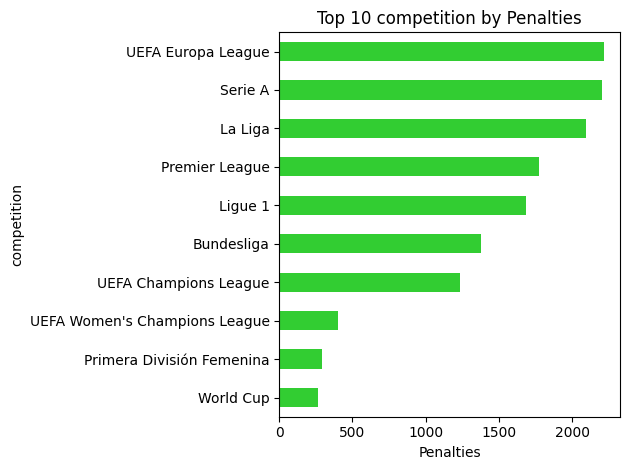

In [22]:
# Penalties per competition
penalties_per_competition = df['competition'].value_counts().head(10)
penalties_per_competition.plot(kind='barh', title='Top 10 competition by Penalties', color='limegreen')
plt.xlabel('Penalties')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

➤ Top 10 Players by Penalty Goals

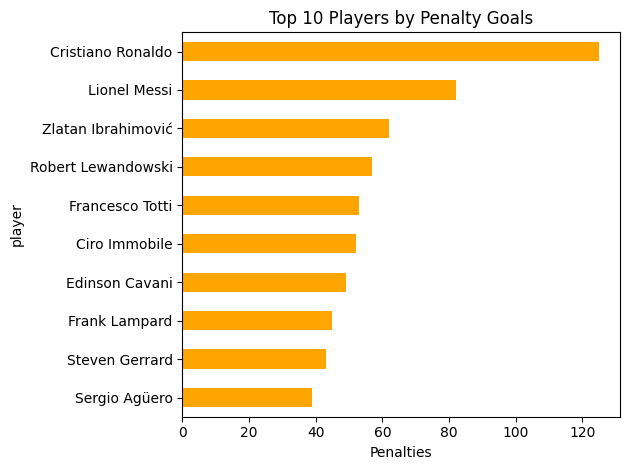

In [24]:
top_players = penalties_df['player'].value_counts().head(10)

top_players.plot(kind='barh', title='Top 10 Players by Penalty Goals', color='orange')
plt.xlabel('Penalties')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

➤ Top Teams Involved (home + away combined)

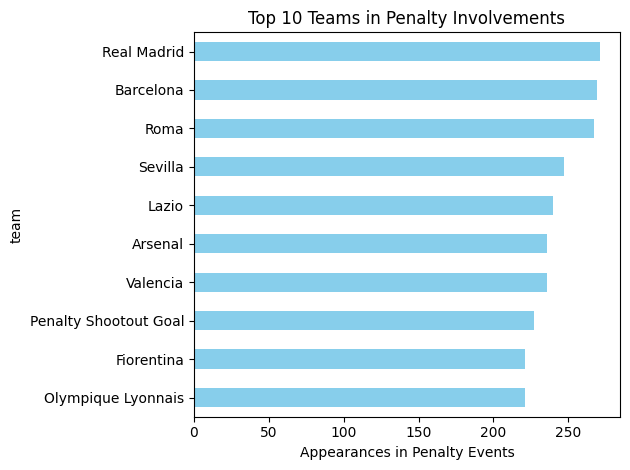

In [25]:
# Combine home and away teams into a single column
teams = pd.concat([
    penalties_df[['home_team']].rename(columns={'home_team': 'team'}),
    penalties_df[['away_team']].rename(columns={'away_team': 'team'})
])

team_counts = teams['team'].value_counts().head(10)

team_counts.plot(kind='barh', title='Top 10 Teams in Penalty Involvements', color='skyblue')
plt.xlabel('Appearances in Penalty Events')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

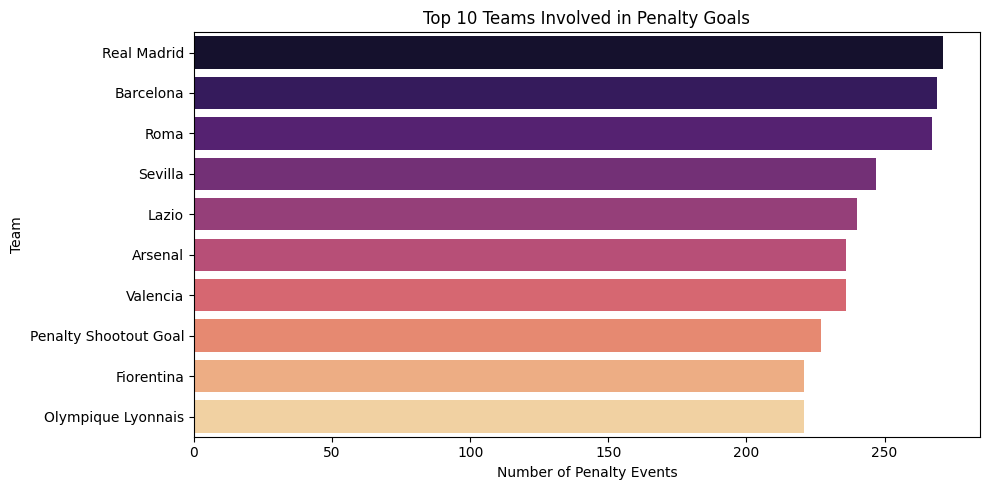

In [80]:
# Focus only on penalty events
penalties_df = df[df['event_type'] == 'Penalty Goal']

# Combine home and away teams into a single 'team' column
team_series = pd.concat([
    penalties_df['home_team'],
    penalties_df['away_team']
])

# Penalties by team (top 10)
top_teams = team_series.value_counts().head(10).reset_index()  # Reset the index here
top_teams.columns = ['team', 'count']  # Rename columns for clarity

plt.figure(figsize=(10, 5))
sns.barplot(data=top_teams, x='count', y='team', hue='team', palette='magma')
plt.title('Top 10 Teams Involved in Penalty Goals')
plt.xlabel('Number of Penalty Events')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

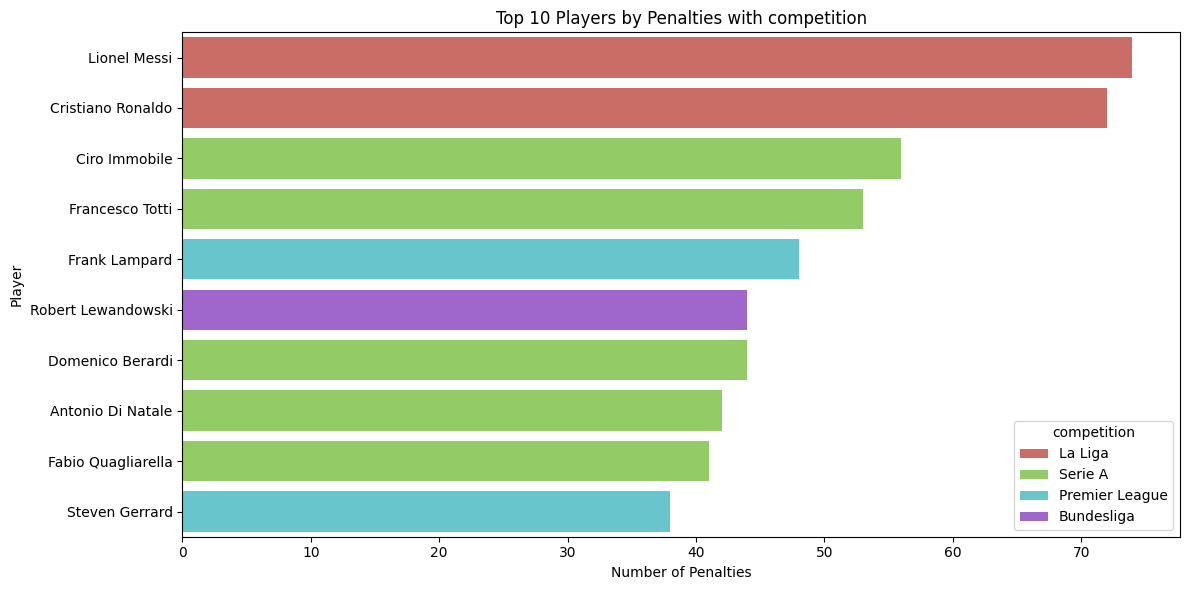

In [76]:
# Penalties per player per competition (top 10)
player_competition = df.groupby(['player', 'competition']).size().reset_index(name='penalties')
top10_players = player_competition.sort_values(by='penalties', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_players, x='penalties', y='player', hue='competition', palette='hls', dodge=False)
plt.title('Top 10 Players by Penalties with competition')
plt.xlabel('Number of Penalties')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

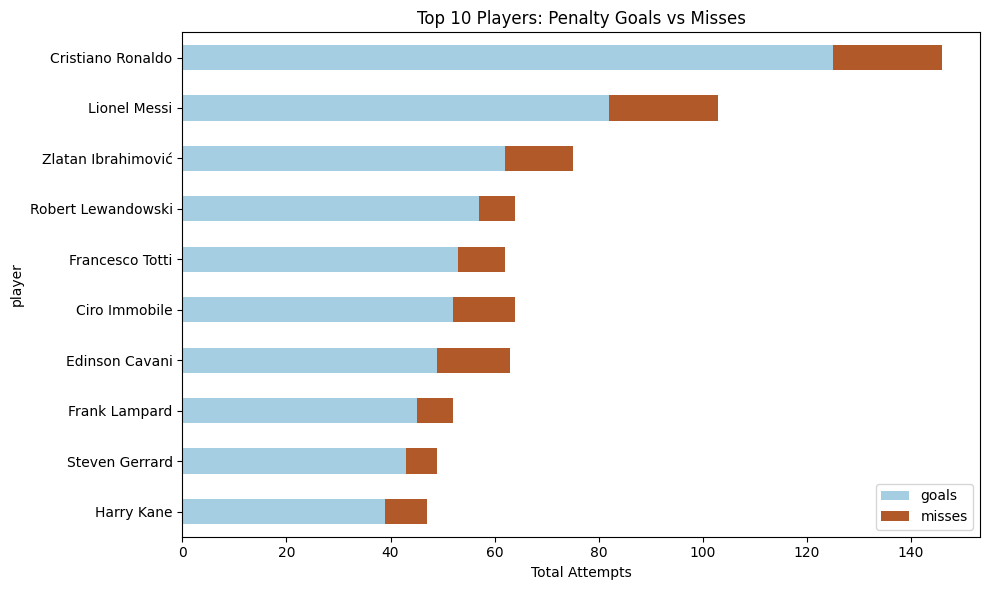

In [83]:
# Compare players with most penalty goals vs misses
goal_df = df[df['event_type'] == 'Penalty Goal']
miss_df = df[df['event_type'] == 'Penalty Miss']

goal_counts = goal_df['player'].value_counts().reset_index()
goal_counts.columns = ['player', 'goals']
miss_counts = miss_df['player'].value_counts().reset_index()
miss_counts.columns = ['player', 'misses']

combined = pd.merge(goal_counts, miss_counts, on='player', how='outer').fillna(0)
combined[['goals', 'misses']] = combined[['goals', 'misses']].astype(int)
top_combined = combined.sort_values(by='goals', ascending=False).head(10)

top_combined.set_index('player')[['goals', 'misses']].plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Top 10 Players: Penalty Goals vs Misses')
plt.xlabel('Total Attempts')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()